In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [3]:
# Load the data
df = pd.read_excel("shipdata_2019.xlsx")
df.head()

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth
0,212209000,10.1377,64.3074,Hamina,Cargo,3416,94.91,15.34
1,212436000,13.5256,77.0755,Hamina,Tanker,6280,116.90,18.00
2,219082000,9.9416,74.6762,Hamina,Tanker,9980,141.20,21.90
3,219083000,11.6038,74.7529,Hamina,Tanker,9980,141.20,21.60
4,219426000,11.9203,56.3253,Hamina,Tanker,3219,99.90,15.00


# 1. Describe the data
#### a) Calculate a cross table of destination and ship type. How many ship types there are? How many ships there are of each type? How many destinations there are? What is the most common destination? What are the most common destinations for the ship types?

In [4]:
pd.crosstab(df.Destination, df.Ship_type, margins = True)

Ship_type,Cargo,Tanker,Tug,All
Destination,,,,
Hamina,9,10,0,19
Helsinki,0,0,1,1
Kotka,8,0,0,8
Kronshtadt,1,1,0,2
Kunda,2,0,0,2
Muuga,6,5,1,12
Paldiski,6,1,2,9
Porvoo,3,16,0,19
Primorsk,0,5,0,5


There are three ship types: cargo, tanker and tug. The data consists of 67 cargo ships, 59 tankers, and 9 tug boats. There are 16 different destinations (Valko Loviisa and Valko-Loviisa are the same). Hamina and Porvoo are the most common destinations. The most common destination is Hamina for cargo ships, Porvoo for tankers, and Tallinn for tugboats. 

#### b) Calculate mean, median and standard deviation of speed, COG, gross tonnage, length and breadth for each ship type. Are there some clear differences between the ship types? What can you say about the attribute distributions based on these values?

In [5]:
# Data frame of the ship type and numerical features
df2 = df[['Ship_type', 'Speed', 'COG', 'Gross_tonnage', 'Length', 'Breadth']]

In [6]:
df2.groupby('Ship_type').mean()

,Speed,COG,Gross_tonnage,Length,Breadth
Ship_type,,,,,
Cargo,9.944228,75.155397,7216.179104,113.482388,16.841791
Tanker,11.222832,78.800515,22092.864407,174.824576,25.704068
Tug,8.514444,97.381967,230.222222,28.562222,8.504444


The average speed for tankers is a little greater than for cargo ships and tugboats. The average COG is about the same for cargo ships and tankers but bigger for tugboats. Gross tonnage is very different in every ship type. Tugboats are on average a lot smaller than cargo ships and tankers.

In [7]:
df2.groupby('Ship_type').median()

,Speed,COG,Gross_tonnage,Length,Breadth
Ship_type,,,,,
Cargo,9.8226,74.0244,3259,99.95,14.40
Tanker,11.6045,75.2065,9980,144.05,21.90
Tug,8.6354,85.4233,256,30.99,9.02


Some of the medians are quite different from the corresponding mean values. The differing medians are smaller than the averages which means that the distributions of those variables are positive skew. 

In [8]:
df2.groupby('Ship_type').std()

,Speed,COG,Gross_tonnage,Length,Breadth
Ship_type,,,,,
Cargo,1.902193,13.597882,9346.956372,41.302107,5.987596
Tanker,1.899707,14.778051,23048.981248,122.715206,10.994205
Tug,0.988812,22.753618,98.255760,6.069649,1.740863


There is a lot of variation in the values of gross tonnage. Also the standard deviation of the length of the tankers is big.

# 2. Attribute value distributions
#### a) Plot four histrograms of the speed using the Sturges', Scott's, square root and Freedman-Diaconis' methods to determine the number of bins. How are the numbers of bins calculated? Compare the distributions of different ship types. Is this a feasible attribute for classification?

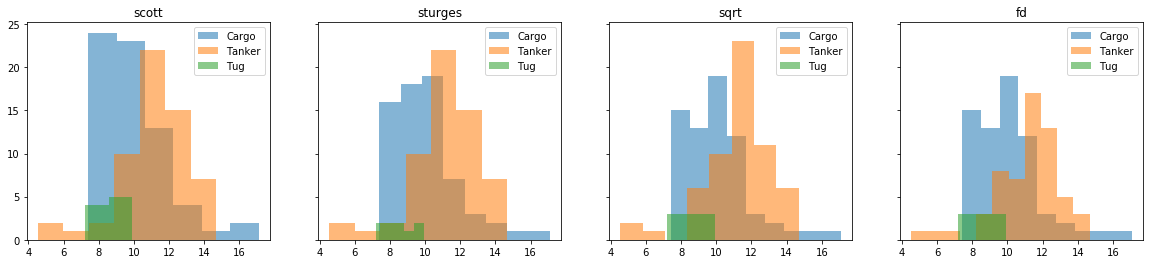

In [9]:
fig, axes = plt.subplots(1, 4, sharey=True, figsize=(20,4))
bins=['scott','sturges','sqrt','fd']
for ax, b in zip(axes.ravel(),bins):
    ax.hist(df['Speed'][df.Ship_type == "Cargo"],bins=b,alpha=0.55,label="Cargo")
    ax.hist(df['Speed'][df.Ship_type == "Tanker"],bins=b,alpha=0.55,label="Tanker")
    ax.hist(df['Speed'][df.Ship_type == "Tug"],bins=b,alpha=0.55,label="Tug")
    ax.legend()
    ax.set_title(b)


In general the formula used to calculate the number of bins is $k = \lceil \frac{\max{x_i} - \min{x_i}}{h} \rceil$, where $x_i$ are the observations and $h$ is bin width. In Sturges' method the number of bins is $k = \lceil\log(n) + 1\rceil$, where $n$ is the number of observations. In Scott's method the bin width is $h = \frac{3.5s}{n^{1/3}}$. Square root method for determining the number of bins is simply $k = \sqrt{n}$. Freedman-Diaconis' method uses the interquatile range of the sample (IQR) to calculate the bin width: $h = 2\frac{\text{IQR}}{n^{1/3}}$.

The shapes of the distributions look a little different depending on the method to compute the binwidth/number of bins. It can be seen that the distribution of tankers' speed is negative skew and the distribution of cargo ships' speed is positive skew. The distributions are highly overlapping so this probably is not the best attribute (at least alone) for a classification task. 

#### b)	Explain what a boxplot is. Plot them for the attributes grouped by the ship type. Are there such outliers that something should be done to them?

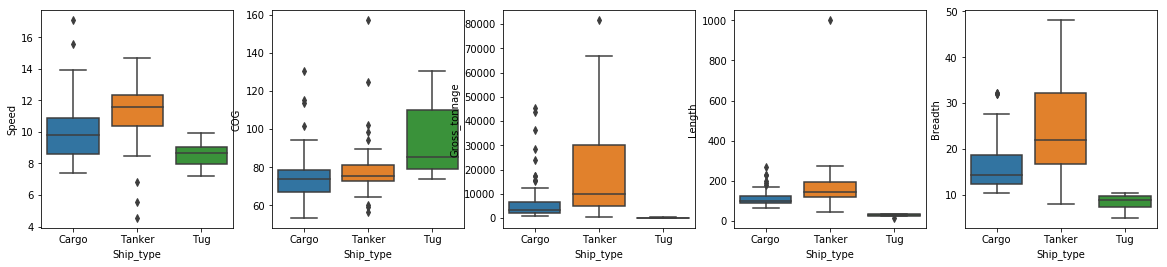

In [10]:
fig, axes = plt.subplots(1,5, figsize = (20,4))
for ax, y in zip(axes.ravel(),df2.columns[1:]):
    sns.boxplot(x = "Ship_type", y = y, data = df2, ax = ax)

Boxplot is a graph showing median (the line inside the box), the first and third quartiles (the bottom and top lines of the box), and whiskers of length at most 1.5 times the interquartile range. The points outside the whiskers are called outliers and are marked with circles in the plots. There are quite many outliers but only the ship length 1000 m seems unreasonable.

# 3. Relationships between attributes
#### a) Plot pairwise scatter plots of the numerical attributes. What kind of relationships can you see? Can you see any outliers? 

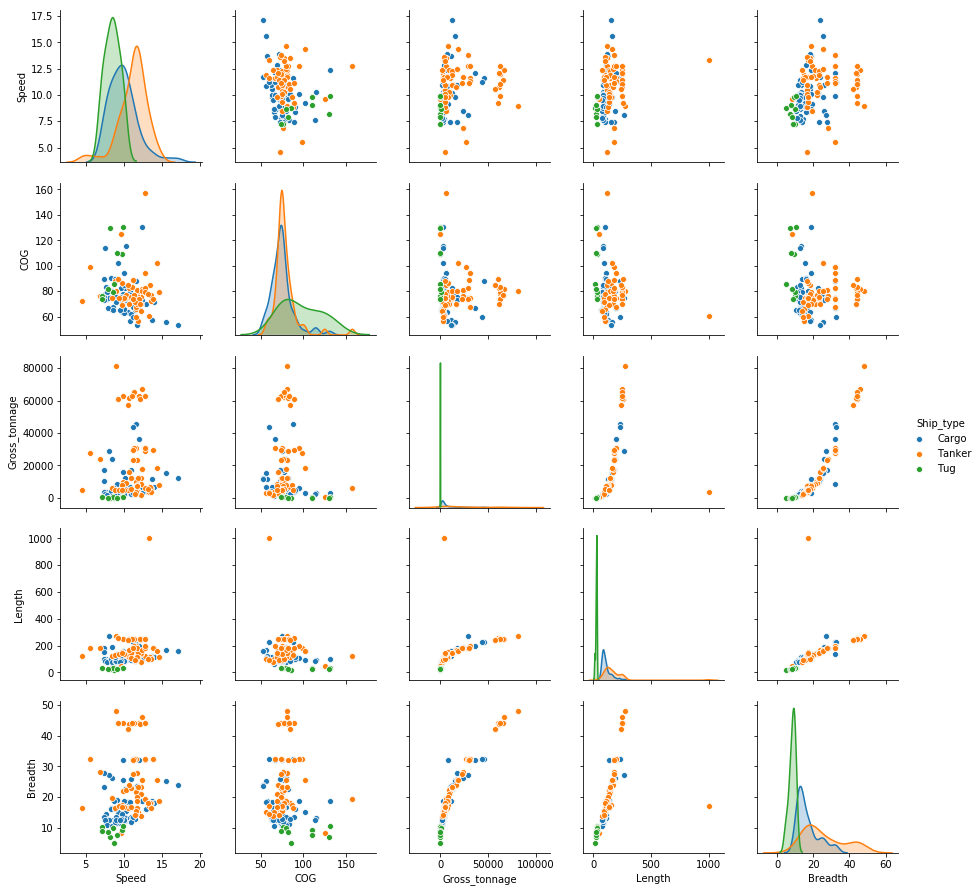

In [11]:
sns.pairplot(df2, hue = 'Ship_type')
plt.show()

The relationship between gross tonnage and breadth seems monotone but not linear. There is a linear relation ship between length and breadth, and length and gross tonnage. Only the outlier is not in the line. The ship length 1000 m is very far from all other observations in every scatter plot where length is one of the an axes. Other pairs of variables seem to be independent of each other.

In [12]:
df_no_outliers = df2[df2.Length < 1000]

#### b) What are Pearson's correlation, Spearman's rho and Kendall's tau? Calculate the correlation coefficient matrices. What kind of relationships there are between the attributes? Does the detected outlier affect the correlation? You can use heatmap to visualize the matrices and more easily see the strength of the relationship.

Pearson's correlation measures linear relationship between variables. It is the covariance of the variables divided by the product of the standard deviations of the variables: $r_{XY} = \frac{s_{XY}}{s_Xs_Y}$. Spearman's rho is a rank based correlation measure which measures monotone relationship between the variables. It considers only the ordering of the values instead of the values. Kendall's tau is also a rank correlation coefficient which is calculated with $\tau = \frac{C-D}{\frac{1}{2}n(n-1)}$, where $C$ is the number of concordant pairs and $D$ is the number of discordant pairs.

All correlation coefficients are in range $-1 \leq r \leq 1$. The greater the absolute value of it, the stronger relationship between variables. If the correlation is negative, the values of one variable increase as the values of the other decrease. If it is positive, the values of one variable increase as the values of the other also increase.

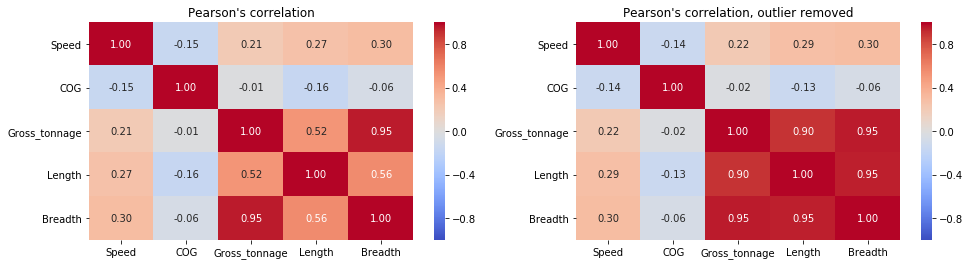

In [13]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
sns.heatmap(df2.corr("pearson"), vmin = -1, vmax = 1, center = 0, cmap = "coolwarm", annot = True, fmt = ".2f", 
            ax = axes[0])
axes[0].set_title("Pearson's correlation")
sns.heatmap(df_no_outliers.corr("pearson"), vmin = -1, vmax = 1, center = 0, cmap = "coolwarm", 
            annot = True, fmt = ".2f", ax = axes[1])
axes[1].set_title("Pearson's correlation, outlier removed")
plt.show()

It can be seen in Pearson's correlation coefficient matrix that COG does not correlate with any other variable. Also the strength of the linear correlation between speed and any other variable is low. Length has a moderate positive correlation with gross tonnage and breadth. The linear relationship between gross tonnage and breadth is very strong.

The correlation coefficient matrix is significantly different if the outlier having ship length 1000 m is removed. Then also length has a very high positive correlation with both gross tonnage and breadth. 

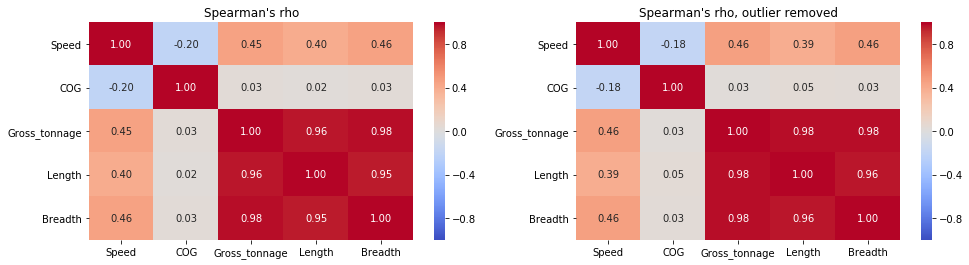

In [14]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
sns.heatmap(df2.corr("spearman"), vmin = -1, vmax = 1, center = 0, cmap = "coolwarm", annot = True, fmt = ".2f", 
            ax = axes[0])
axes[0].set_title("Spearman's rho")
sns.heatmap(df_no_outliers.corr("spearman"), vmin = -1, vmax = 1, center = 0, cmap = "coolwarm", 
            annot = True, fmt = ".2f", ax = axes[1])
axes[1].set_title("Spearman's rho, outlier removed")
plt.show()

The ourlier does not affect the Spearman's rho almost at all. Otherwise the matrices are similar to the Pearson's correlation coefficient matrices.

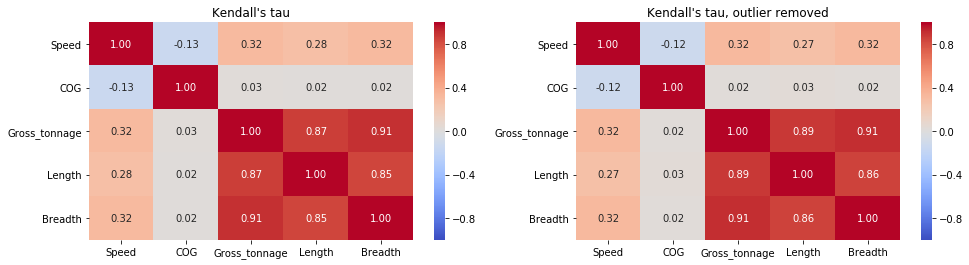

In [15]:
fig, axes = plt.subplots(1,2, figsize = (16,4))
sns.heatmap(df2.corr("kendall"), vmin = -1, vmax = 1, center = 0, cmap = "coolwarm", annot = True, fmt = ".2f", 
            ax = axes[0])
axes[0].set_title("Kendall's tau")
sns.heatmap(df_no_outliers.corr("kendall"), vmin = -1, vmax = 1, center = 0, cmap = "coolwarm", 
            annot = True, fmt = ".2f", ax = axes[1])
axes[1].set_title("Kendall's tau, outlier removed")
plt.show()

Kendall's tau rank correlation coefficient matrices are similar to the Spearman's rank correlation coefficient matrices. 

Overall results of the correlation analysis is that the COG does not correlate with any other variable, speed has a negligible/low positive correlation with gross tonnage, length and breadth. Gross tonnage, length and breadth have high/very high positive monotone correlations and the relationships are linear if the outlier is removed. 

# 4. Dimensionality reduction
#### Explain what principal component analysis is. Do that with and without z-score normalization. Visualize the results with a scatter plot by projecting the data to the first two principal components. How much of the variation is explained with the two principal components?

Principal component analysis is a dimensionality reduction method which preserves as much of the variation in the data as possible. The first principal component is in the direction that the data variates the most. The following principal components again try to preserve as much of the variance as possible but they have to be otrogonal to the preceding principal components. 

Z-score normalization should be done before principal component analysis so that all variables contribute equally to the overall variation. 

In [16]:
# Ignore the DataConversionWarning when scaling the data
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

# Create a scaler
scaler = preprocessing.StandardScaler().fit(df_no_outliers.iloc[:,1:])
# Z-score normalize the data
df_transformed = scaler.transform(df_no_outliers.iloc[:,1:])

# Principal component analysis
pca = PCA(n_components=2).fit(df_no_outliers.iloc[:,1:])
pca_norm = PCA(n_components=2).fit(df_transformed)
df_pca = pca.transform(df_no_outliers.iloc[:,1:])
df_pca_norm = pca_norm.transform(df_transformed)

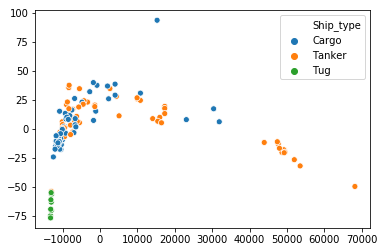

Explained variance ratio [9.99997318e-01 2.01193677e-06]


In [17]:
sns.scatterplot(df_pca[:,0], df_pca[:,1], hue = df_no_outliers.Ship_type)
plt.show()
print("Explained variance ratio", pca.explained_variance_ratio_)

The values of gross tonnage are so much bigger than the values of any other variables so obviously also the greatest variance is in that direction. This was already seen at the beginning of this exercise in the table of standard deviations. Now the first principal component explains almost all of the variance. 

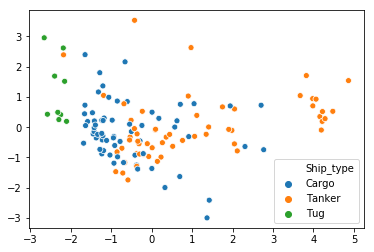

Explained variance ratio [0.59851117 0.21339372]


In [18]:
sns.scatterplot(df_pca_norm[:,0], df_pca_norm[:,1], hue = df_no_outliers.Ship_type)
plt.show()
print("Explained variance ratio", pca_norm.explained_variance_ratio_)

After z-score standardization, also other attributes have an effect on the overall variance. Now the first two principal components explain little over 80 % of the overall variation. 

There are no obvious clusters in neither of the scatter plots of the principal components. Some tankers are apart from the others but still most of the tankers are plotted among/right next to the cargo ships. Tugboats are little bit further away from other ship types. 